In [1]:
import pprint
import numpy as np

from sklearn.linear_model import *
from lineartree import LinearTreeClassifier, LinearTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import make_classification, make_regression

import warnings
warnings.simplefilter('ignore')

# Regression

In [2]:
X, y = make_regression(n_samples=5000, n_features=10,
                       n_informative=3, n_targets=1,
                       random_state=0, shuffle=False)

t = X[:,0] > np.quantile(X[:,0], 0.5)
y[t] += X[t][:,3]*X[t][:,4]
y[~t] += X[~t][:,1]*X[~t][:,2]

t = X[:,5] > np.quantile(X[:,5], 0.7)
y[t] += X[t][:,6]*X[t][:,7]
y[~t] += X[~t][:,8]*X[~t][:,9]

X.shape, y.shape

((5000, 10), (5000,))

### default configuration 

In [3]:
regr = LinearTreeRegressor(LinearRegression(), criterion='mse')
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression())

In [4]:
regr.feature_importances_

array([0.        , 0.15034414, 0.1703983 , 0.16322298, 0.        ,
       0.        , 0.        , 0.        , 0.12494112, 0.39109346])

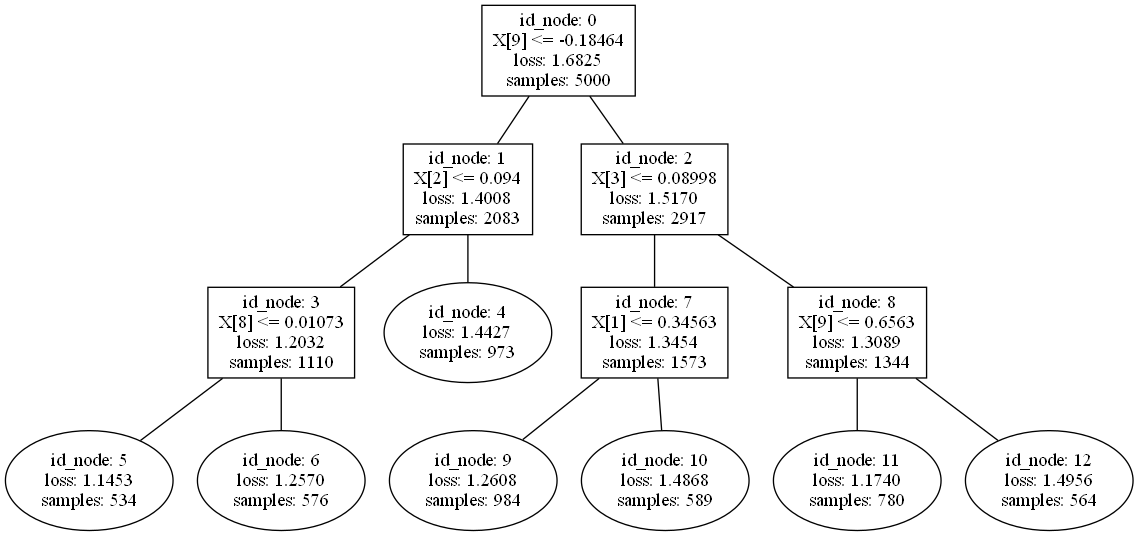

In [5]:
regr.plot_model()

In [6]:
pprint.pprint(regr.summary())

{0: {'children': (1, 2),
     'col': 9,
     'loss': 1.68251,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 5000,
     'th': -0.18464},
 1: {'children': (3, 4),
     'col': 2,
     'loss': 1.4008,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 2083,
     'th': 0.094},
 2: {'children': (7, 8),
     'col': 3,
     'loss': 1.51698,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 2917,
     'th': 0.08998},
 3: {'children': (5, 6),
     'col': 8,
     'loss': 1.20325,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 1110,
     'th': 0.01073},
 4: {'loss': 1.44269, 'models': LinearRegression(), 'samples': 973},
 5: {'loss': 1.14525, 'models': LinearRegression(), 'samples': 534},
 6: {'loss': 1.25703, 'models': LinearRegression(), 'samples': 576},
 7: {'children': (9, 10),
     'col': 1,
     'loss': 1.34542,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 1573,
     

In [7]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 13), 0.9998658335980741)

### using linear_features

In [8]:
regr = LinearTreeRegressor(
    LinearRegression(), criterion='mse',
    linear_features=[0,1,2]
)
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    linear_features=[0, 1, 2])

In [9]:
regr.feature_importances_

array([0.32123659, 0.22884655, 0.40982417, 0.01760782, 0.        ,
       0.        , 0.        , 0.02248488, 0.        , 0.        ])

In [10]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.9998467954928835)

### using split_features

In [11]:
regr = LinearTreeRegressor(
    LinearRegression(), criterion='mse',
    split_features=[0,1,2,3,4]
)
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    split_features=[0, 1, 2, 3, 4])

In [12]:
regr.feature_importances_

array([0.67775556, 0.        , 0.10825779, 0.1013291 , 0.11265755,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [13]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.9998658407000435)

### using linear_features + split_features

In [14]:
regr = LinearTreeRegressor(
    LinearRegression(), criterion='mse',
    linear_features=[0,1,2,5,6],
    split_features=[0,1,2,3,4]
)
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    linear_features=[0, 1, 2, 5, 6],
                    split_features=[0, 1, 2, 3, 4])

In [15]:
regr.feature_importances_

array([0.31934091, 0.24955919, 0.40197962, 0.02912028, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [16]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.999847741958613)

### using linear_features + split_features + categorical_features

In [17]:
regr = LinearTreeRegressor(
    LinearRegression(), criterion='mse',
    linear_features=[0,1,2,5,6],
    split_features=[0,1,3],
    categorical_features=[3,7]
)
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    categorical_features=[3, 7],
                    linear_features=[0, 1, 2, 5, 6], split_features=[0, 1, 3])

In [18]:
regr.feature_importances_

array([0.29751991, 0.66369077, 0.        , 0.03878932, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [19]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.9998453110496642)

### mae criterion

In [20]:
regr = LinearTreeRegressor(LinearRegression(), criterion='mae')
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(), criterion='mae')

In [21]:
regr.feature_importances_

array([0.12267055, 0.        , 0.13439981, 0.26153566, 0.        ,
       0.        , 0.        , 0.        , 0.14019823, 0.34119575])

In [22]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.999870061024891)

### poisson criterion 

In [23]:
regr = LinearTreeRegressor(LinearRegression(), criterion='poisson')
regr.fit(X, np.abs(y))

LinearTreeRegressor(base_estimator=LinearRegression(), criterion='poisson')

In [24]:
regr.feature_importances_

array([0.84497381, 0.        , 0.        , 0.        , 0.        ,
       0.02035241, 0.06404554, 0.03695349, 0.        , 0.03367475])

In [25]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), -0.8826707423702098)

### multi-target regression with weights

In [26]:
X, y = make_regression(n_samples=5000, n_features=10,
                       n_informative=3, n_targets=2,
                       random_state=0, shuffle=False)

t = X[:,0] > np.quantile(X[:,0], 0.5)
y[np.ix_(t,[0])] += (X[t][:,3]*X[t][:,4]).reshape(-1,1)
y[np.ix_(~t,[0])] += (X[~t][:,1]*X[~t][:,2]).reshape(-1,1)

t = X[:,5] > np.quantile(X[:,5], 0.7)
y[np.ix_(t,[1])] += (X[t][:,6]*X[t][:,7]).reshape(-1,1)
y[np.ix_(~t,[1])] += (X[~t][:,8]*X[~t][:,9]).reshape(-1,1)

W = np.random.uniform(1,3, (X.shape[0],))

X.shape, y.shape

((5000, 10), (5000, 2))

In [27]:
regr = LinearTreeRegressor(LinearRegression(), criterion='mse')
regr.fit(X, y, W)

LinearTreeRegressor(base_estimator=LinearRegression())

In [28]:
regr.feature_importances_

array([0.15671281, 0.16347024, 0.1365394 , 0.        , 0.14731655,
       0.03439822, 0.        , 0.        , 0.22676238, 0.1348004 ])

In [29]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000, 2), (5000,), (5000, 15), 0.9999062352290982)

# Hyperparameter Tuning

In [30]:
parameters = {'base_estimator__alpha':[1, 5, 10], 'max_depth':[3, 5, 10]}
search = GridSearchCV(LinearTreeRegressor(Ridge()), parameters, n_jobs=-1)
search.fit(X,y)

GridSearchCV(estimator=LinearTreeRegressor(base_estimator=Ridge()), n_jobs=-1,
             param_grid={'base_estimator__alpha': [1, 5, 10],
                         'max_depth': [3, 5, 10]})

In [31]:
search.best_params_

{'base_estimator__alpha': 1, 'max_depth': 3}

# Classification

In [32]:
X, y = make_classification(n_samples=8000, n_features=15, n_classes=3, 
                           n_redundant=4, n_informative=5,
                           n_clusters_per_class=1,
                           shuffle=True, random_state=33)

X.shape, y.shape

((8000, 15), (8000,))

### default configuration

In [33]:
clf = LinearTreeClassifier(RidgeClassifier(), criterion='hamming')
clf.fit(X, y)

LinearTreeClassifier(base_estimator=RidgeClassifier())

In [34]:
clf.feature_importances_

array([0.09379374, 0.24276051, 0.        , 0.42029795, 0.        ,
       0.        , 0.        , 0.11931671, 0.12383108, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

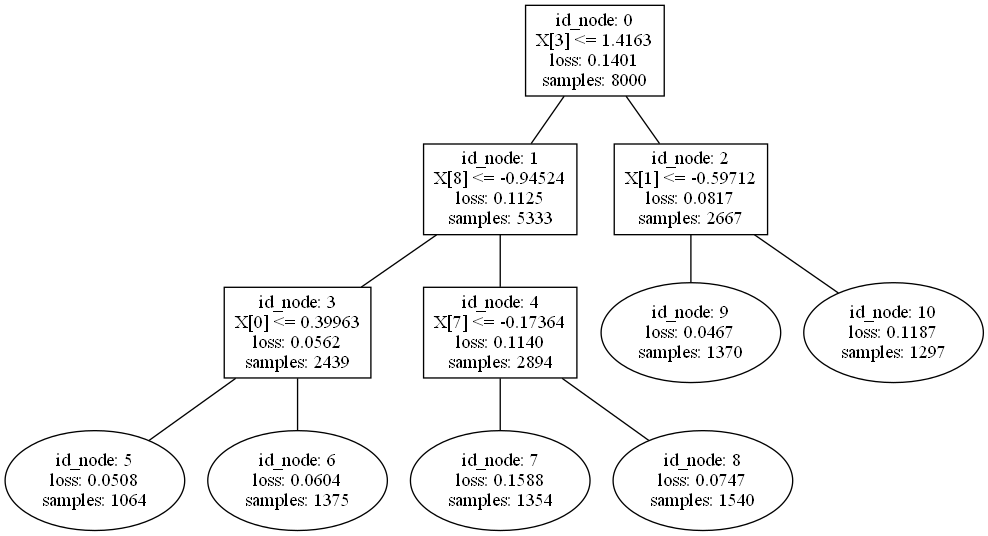

In [35]:
clf.plot_model()

In [36]:
pprint.pprint(clf.summary())

{0: {'children': (1, 2),
     'col': 3,
     'loss': 0.14012,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 8000,
     'th': 1.4163},
 1: {'children': (3, 4),
     'col': 8,
     'loss': 0.11251,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 5333,
     'th': -0.94524},
 2: {'children': (9, 10),
     'col': 1,
     'loss': 0.08174,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 2667,
     'th': -0.59712},
 3: {'children': (5, 6),
     'col': 0,
     'loss': 0.05617,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 2439,
     'th': 0.39963},
 4: {'children': (7, 8),
     'col': 7,
     'loss': 0.11403,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 2894,
     'th': -0.17364},
 5: {'classes': array([0, 1, 2]),
     'loss': 0.05075,
     'models': RidgeClassifier(),
     'samples': 1064},
 6: {'classes': array([0, 1, 2]),
     'loss': 0.06036,
     'models': RidgeClassifi

In [37]:
clf.predict(X).shape, clf.predict_proba(X).shape, clf.apply(X).shape, clf.decision_path(X).toarray().shape, clf.score(X,y)

((8000,), (8000, 3), (8000,), (8000, 11), 0.914375)

### crossentropy criterion

In [38]:
clf = LinearTreeClassifier(LogisticRegression(), criterion='crossentropy')
clf.fit(X, y)

LinearTreeClassifier(base_estimator=LogisticRegression(),
                     criterion='crossentropy')

In [39]:
clf.feature_importances_

array([0.16432162, 0.14521493, 0.        , 0.17889327, 0.        ,
       0.        , 0.03135489, 0.        , 0.48021529, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [40]:
clf.predict(X).shape, clf.predict_proba(X).shape, clf.apply(X).shape, clf.decision_path(X).toarray().shape, clf.score(X,y)

((8000,), (8000, 3), (8000,), (8000, 13), 0.933375)

# ACAS Xu Classification

In [41]:
import pickle
from functools import lru_cache
import time
import math
import argparse

import numpy as np
from scipy import ndimage
from scipy.linalg import expm

import onnxruntime as ort
from numba import njit


from acasxu_dubins_decision_tree import *

## Load data from ACAS Xu

#train_x = pickle.load(open('ACAS_train_x.pickle', 'rb'))
#train_y = pickle.load(open('ACAS_train_y.pickle', 'rb'))
#test_x = pickle.load(open('ACAS_test_x.pickle', 'rb'))
#test_y = pickle.load(open('ACAS_test_y.pickle', 'rb'))

In [75]:
### Load networks
nets = load_networks()
net = nets[0]

###Generate training points

test_pts = 100000
np.random.seed(seed = 23)
num_slices = 1

test_states = np.random.rand(test_pts, 5)
#tree_cmds = np.zeros([num_slices, test_pts])
net_cmds = np.zeros([test_pts])

slice_min = -1/6 * np.pi
slice_max = 1/6 * np.pi
slice_var = np.linspace(-np.pi/6, np.pi/6, num = num_slices)
print(slice_var)

for slice_ind in range(num_slices):
    for i in range(test_pts):
        # Load the correct random state and scale it appropriately
        test_state = test_states[i, :]

        test_state = np.multiply(test_state, np.array([60760, 2 * np.pi/6, 2 * np.pi/6, 1100, 1200])) + np.array([0, -np.pi/6, -np.pi/6, 100, 0])
        
        # test_state = test_state.reshape(1, -1)
        #print(test_state.shape)

        # Fix 3 of the states, so we can compare
        #test_state[0] = 60760/2
        #test_state[1] = 0#slice_var[slice_ind]#np.pi / 4
        #test_state[2] = 0 #-np.pi / 4
        
        # Store the correctly scaled test state in the array
        test_states[i, :] = np.copy(test_state)

        # Save the ground-truth command from the neural net
        test_res = run_network(net, test_state)
        net_cmds[i] = np.argmin(test_res)

        # Save the predicted command from the decision tree
        #tree_cmd = best_tree.predict(test_state.reshape(1, -1))
        #tree_cmds[i] = tree_cmd.item()

    
    ######
    # Train Tree
    #tree_cmds[slice_ind,:] = best_tree.predict(test_states[slice_ind, :, :])

[-0.52359878]


In [76]:
clf = LinearTreeClassifier(RidgeClassifier(), min_samples_leaf = 20, criterion='hamming')
clf.fit(test_states, net_cmds)

clf.feature_importances_
'''
summary = []
max_depth=20

for n, N in clf._nodes.items():
      if len(n) >= max_depth:
            continue

      cl, cr = N.children
      Cl = (clf._nodes[cl] if cl in clf._nodes
          else clf._leaves[cl])
      Cr = (clf._nodes[cr] if cr in clf._nodes
          else clf._leaves[cr])


      summary[N.id] = {
        'th': round(Cl.threshold[-1][-1], 5),
        'loss': round(Cl.w_loss + Cr.w_loss, 5),
        'samples': Cl.n_samples + Cr.n_samples,
        'children': (Cl.id, Cr.id),
        'models': (Cl.model, Cr.model),
        'params': Cl.model.get_params(deep=True)
    }'''

"\nsummary = []\nmax_depth=20\n\nfor n, N in clf._nodes.items():\n      if len(n) >= max_depth:\n            continue\n\n      cl, cr = N.children\n      Cl = (clf._nodes[cl] if cl in clf._nodes\n          else clf._leaves[cl])\n      Cr = (clf._nodes[cr] if cr in clf._nodes\n          else clf._leaves[cr])\n\n\n      summary[N.id] = {\n        'th': round(Cl.threshold[-1][-1], 5),\n        'loss': round(Cl.w_loss + Cr.w_loss, 5),\n        'samples': Cl.n_samples + Cr.n_samples,\n        'children': (Cl.id, Cr.id),\n        'models': (Cl.model, Cr.model),\n        'params': Cl.model.get_params(deep=True)\n    }"

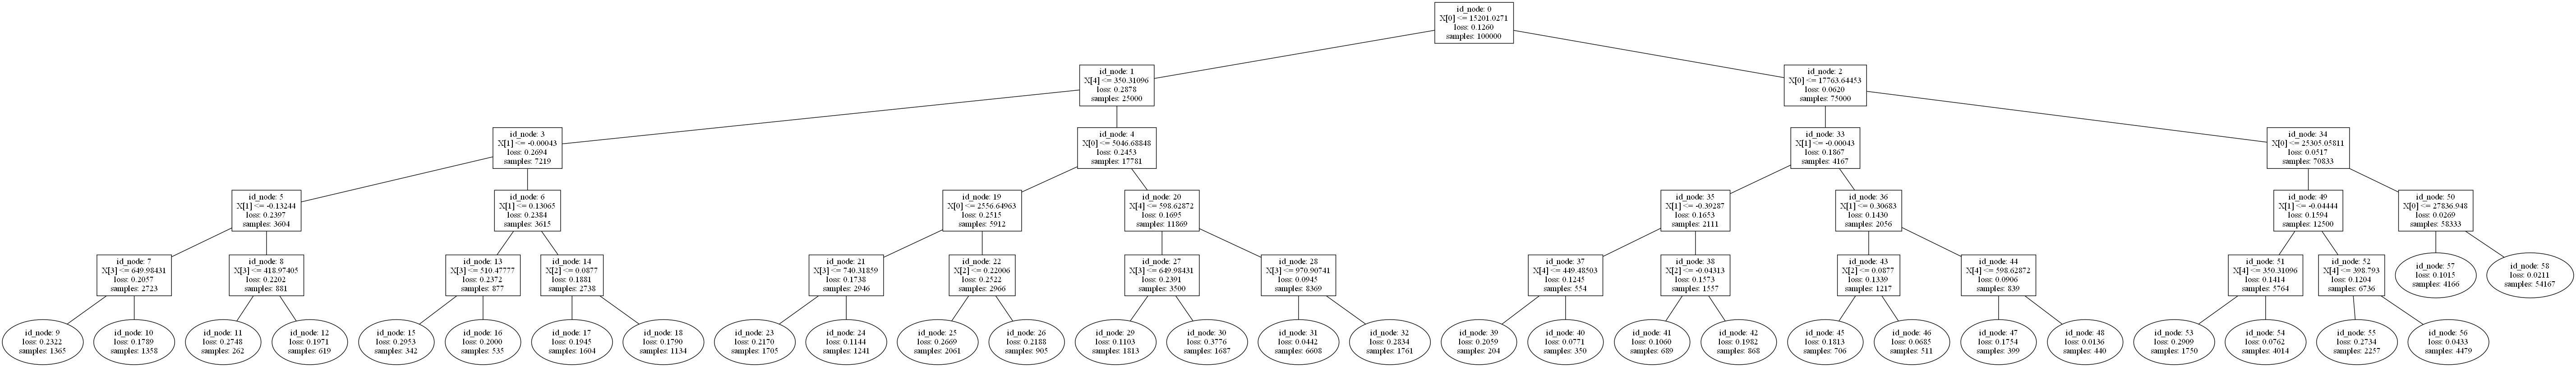

In [77]:
clf.plot_model()

In [72]:
#pprint.pprint(clf.summary())

clf_sum = clf.summary(only_leaves = False)

for m, (i,l) in enumerate(clf_sum.items()):
    print(f"Node {i}")
    print(m)
    print(l)
    #print(l['models'].coef_)

Node 0
0
{'col': 0, 'th': 15170.49341, 'loss': 0.1253, 'samples': 10000, 'children': (1, 2), 'models': (RidgeClassifier(), RidgeClassifier())}
Node 1
1
{'col': 4, 'th': 337.52665, 'loss': 0.2748, 'samples': 2500, 'children': (3, 4), 'models': (RidgeClassifier(), RidgeClassifier())}
Node 2
2
{'col': 0, 'th': 17819.11841, 'loss': 0.0572, 'samples': 7500, 'children': (33, 34), 'models': (RidgeClassifier(), RidgeClassifier())}
Node 3
3
{'col': 0, 'th': 5014.10938, 'loss': 0.25348, 'samples': 718, 'children': (5, 6), 'models': (RidgeClassifier(), RidgeClassifier())}
Node 4
4
{'col': 0, 'th': 5014.10938, 'loss': 0.24635, 'samples': 1782, 'children': (19, 20), 'models': (RidgeClassifier(), RidgeClassifier())}
Node 5
5
{'col': 2, 'th': 0.17205, 'loss': 0.0553, 'samples': 217, 'children': (7, 8), 'models': (RidgeClassifier(), RidgeClassifier())}
Node 6
6
{'col': 1, 'th': -0.22592, 'loss': 0.29541, 'samples': 501, 'children': (13, 14), 'models': (RidgeClassifier(), RidgeClassifier())}
Node 7
7
{

In [78]:
clf.predict(test_states).shape, clf.predict_proba(test_states).shape, clf.apply(test_states).shape, clf.decision_path(test_states).toarray().shape, clf.score(test_states, net_cmds)

((100000,), (100000, 5), (100000,), (100000, 59), 0.91889)

In [80]:
tester_pts = 10000

tester_states = np.random.rand(tester_pts, 5)
net_tester_cmds = np.zeros([tester_pts])
for i in range(tester_pts):
    # Load the correct random state and scale it appropriately
    tester_state = tester_states[i, :]

    tester_state = np.multiply(tester_state, np.array([60760, 2 * np.pi/36, 2 * np.pi/36, 1100, 1200])) + np.array([0, -np.pi/36, -np.pi/36, 100, 0])
        
    # test_state = test_state.reshape(1, -1)
    #print(test_state.shape)

    # Fix 3 of the states, so we can compare
    tester_state[0] = 60760/2
    tester_state[1] = 0#slice_var[slice_ind]#np.pi / 4
    tester_state[2] = 0 #-np.pi / 4
        
    # Store the correctly scaled test state in the array
    tester_states[i, :] = np.copy(tester_state)
    # Save the ground-truth command from the neural net
    tester_res = run_network(net, tester_state)
    net_tester_cmds[i] = np.argmin(tester_res)

print(f"Testing score:  {clf.score(tester_states, net_tester_cmds)}")
tree_tester_cmds = clf.predict(tester_states)

Testing score:  0.8348


## Plot Tree

In [48]:
#train_x_fig = pickle.load(open('ACAS_train_x_fig.pickle', 'rb'))
#train_y_fig = pickle.load(open('ACAS_train_y_fig.pickle', 'rb'))

#tree_y_fig = clf.predict(train_x_fig)
#print(clf.score(train_x_fig, train_y_fig))

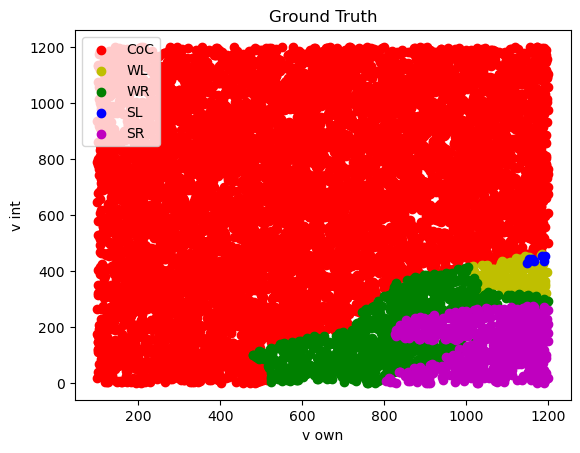

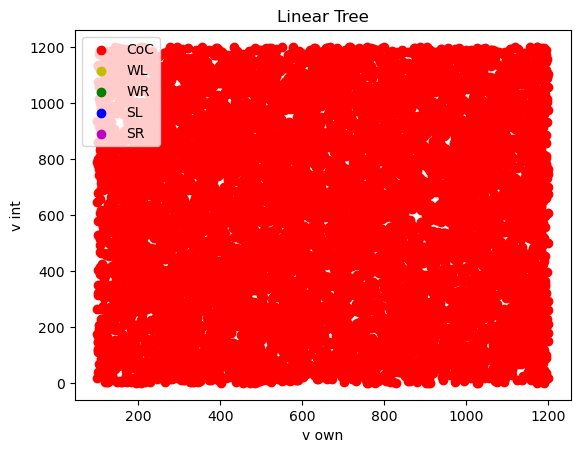

In [69]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def get_cmap(cmds):
    cmap_array = []
    labels = []
    for i in range(cmds.size):
        if cmds[i] == 0:
            cmap_array.append('r')
            labels.append('CoC')
        elif cmds[i] == 1:
            cmap_array.append('y')
            labels.append('WL')
        elif cmds[i] == 2:
            cmap_array.append('g')
            labels.append('WR')
        elif cmds[i] == 3:
            cmap_array.append('b')
            labels.append('SL')
        else:
            cmap_array.append('m')
            labels.append('SR')
    
    return cmap_array, labels

plt.figure(0)
cmap, labels = get_cmap(net_tester_cmds) #cm.rainbow(net_cmds / np.mean(net_cmds))

coc_labels = np.where(labels == 'CoC')
wl_labels = np.where(labels == 'WL')

values = ['CoC', 'WL', 'WR', 'SL', 'SR']

#plt.scatter(test_states[coc_labels, 3], test_states[coc_labels, 4], color = cmap[coc_labels], label = 'CoC')
#plt.scatter(test_states[wl_labels, 3], test_states[wl_labels, 4], color = cmap[wl_labels], label = 'WL')
colors = ['r', 'y', 'g', 'b', 'm']

for i in range(0, len(values)):
    ix = np.where(net_tester_cmds == i)
    plt.scatter(tester_states[ix, 3], tester_states[ix, 4], c = colors[i], label = values[i]) 
#plt.scatter(test_states[:, 3], test_states[:, 4], cmap = colors, c = net_cmds)
plt.title("Ground Truth")
plt.xlabel("v own")
plt.ylabel("v int")
plt.legend()
#plt.legend(['r', 'y', 'g', 'b', 'm'], ['CoC', 'WL', 'WR', 'SL', 'SR'])

plt.figure(1)
#cmap2, labels2 = get_cmap(tree_cmds) #cm.rainbow(tree_cmds / np.mean(tree_cmds))
#plt.scatter(test_states[:, 3], test_states[:, 4], cmap = colors, c = tree_cmds)
for i in range(0, len(values)):
    ix = np.where(tree_tester_cmds == i)
    plt.scatter(tester_states[ix, 3], tester_states[ix, 4], c = colors[i], label = values[i]) 
#plt.scatter(test_states[:, 3], test_states[:, 4], cmap = colors, c = net_cmds)
plt.legend()


plt.title("Linear Tree")
plt.xlabel("v own")
plt.ylabel("v int")
#plt.legend(*scatter.legend_elements())
#plt.legend()


plt.show()

In [50]:
print(np.max(train_x_fig[:, 4]))

NameError: name 'train_x_fig' is not defined

In [118]:
print(clf._leaves)

{'LL': <lineartree._classes.Node object at 0x000001FC30661E20>, 'LRLLL': <lineartree._classes.Node object at 0x000001FC1E5E44A0>, 'LRLLR': <lineartree._classes.Node object at 0x000001FC1E5E7EF0>, 'LRLR': <lineartree._classes.Node object at 0x000001FC1E5A3650>, 'LRR': <lineartree._classes.Node object at 0x000001FC2FFBB5F0>, 'R': <lineartree._classes.Node object at 0x000001FC306F92B0>}
